<a href="https://colab.research.google.com/github/ju-liana-rodrigues/Bootcamp-ML-Avanti/blob/main/Decoder_flood_area_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source import complete.
modules loaded


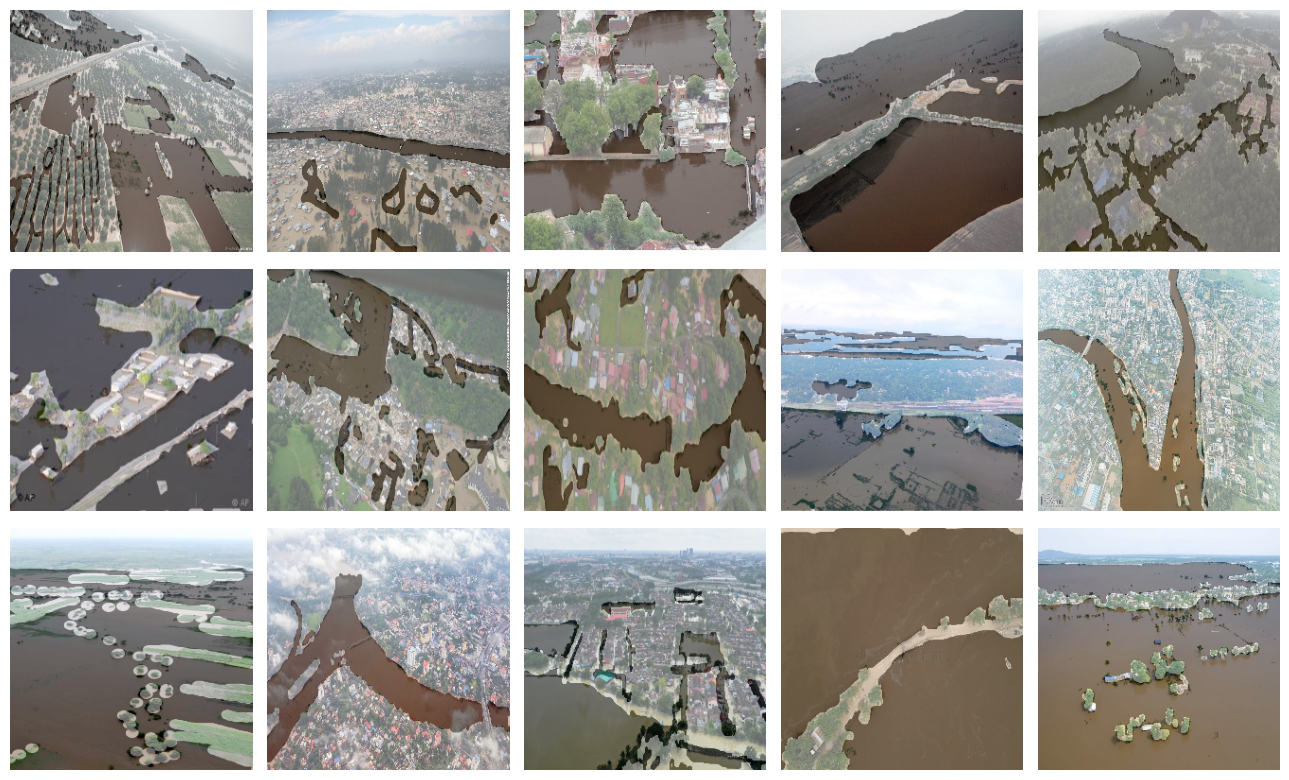

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 256, 256,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 256, 256,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit

 Total params: 6,910,334 (26.36 MB)

 Trainable params: 6,865,447 (26.19 MB)

 Non-trainable params: 44,887 (175.34 KB)

Epoch 1/10
4/7 ━━━━━━━━━━━━━━━━━━━━ 2:09 43s/step - accuracy: 0.4709 - loss: 2.2991

In [ ]:

import kagglehub
faizalkarim_flood_area_segmentation_path = kagglehub.dataset_download('faizalkarim/flood-area-segmentation')

print('Data source import complete.')

# import system libs
import os
import time
import glob
import shutil

# import data handling tools
import cv2
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
import tensorflow.image as tfi
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D,  MaxPool2D, UpSampling2D, concatenate, Activation
from tensorflow.keras.layers import Layer, Input, Add, Multiply, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.applications import EfficientNetB2
import tensorflow.keras.backend as K

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

def create_data(data_dir):
    image_paths = []
    mask_paths = []

    folds = sorted(os.listdir(data_dir))
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        if fold in ['image', 'Image', 'images', 'Images', 'IMAGES']:
            images = sorted(os.listdir(foldpath))
            for image in images:
                fpath = os.path.join(foldpath, image)
                image_paths.append(fpath)

        elif fold in ['mask', 'Mask', 'masks', 'Masks', 'MASKS']:
            masks = sorted(os.listdir(foldpath))
            for mask in masks:
                fpath = os.path.join(foldpath, mask)
                mask_paths.append(fpath)
        else:
            continue

    return image_paths, mask_paths

# function to read an image
def load_image(image, SIZE):
    return np.round(tfi.resize(img_to_array(load_img(image)) / 255., (SIZE, SIZE)), 4)

# function to read multiple images
def load_images(image_paths, SIZE, mask=False, trim=None):
    if trim is not None:
        image_paths = image_paths[:trim]

    if mask:
        images = np.zeros(shape=(len(image_paths), SIZE, SIZE, 1))
    else:
        images = np.zeros(shape=(len(image_paths), SIZE, SIZE, 3))

    for i, image in enumerate(image_paths):
        img = load_image(image, SIZE)
        if mask:
            images[i] = img[:, :, :1]
        else:
            images[i] = img

    return images

def show_image(image, title=None, cmap=None, alpha=1):
    plt.imshow(image, cmap=cmap, alpha=alpha)
    if title is not None:
        plt.title(title)
    plt.axis('off')

def show_mask(image, mask, cmap=None, alpha=0.4):
    plt.imshow(image)
    plt.imshow(tf.squeeze(mask), cmap=cmap, alpha=alpha)
    plt.axis('off')

def show_images(imgs, msks):
    plt.figure(figsize=(13,8))

    for i in range(15):
        plt.subplot(3,5,i+1)
        id = np.random.randint(len(imgs))
        show_mask(imgs[id], msks[id], cmap='binary')

    plt.tight_layout()
    plt.show()

class EncoderBlock(Layer):

    def __init__(self, filters, rate, pooling=True, **kwargs):
        super(EncoderBlock, self).__init__(**kwargs)

        self.filters = filters
        self.rate = rate
        self.pooling = pooling

        self.c1 = Conv2D(filters, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')
        self.drop = Dropout(rate)
        self.c2 = Conv2D(filters, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')
        self.pool = MaxPool2D()

    def call(self, X):
        x = self.c1(X)
        x = self.drop(x)
        x = self.c2(x)
        if self.pooling:
            y = self.pool(x)
            return y, x
        else:
            return x

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "filters":self.filters,
            'rate':self.rate,
            'pooling':self.pooling
        }

from tensorflow.keras.layers import Layer, UpSampling2D, concatenate


class DecoderBlock(Layer):
    """
    Um bloco de decodificador para arquiteturas de redes neurais convolucionais.

    Este bloco realiza um upsampling da entrada e a concatena com uma conexão skip,
    seguida por um bloco de codificador sem pooling.
    """
    def __init__(self, filters, rate, **kwargs):
        """
        Inicializa o bloco de decodificador.

        Args:
            filters (int): O número de filtros para o bloco de codificador interno.
            rate (float): A taxa de dropout para o bloco de codificador interno.
            **kwargs: Argumentos de palavra-chave adicionais passados para a camada pai (Layer).
        """
        super(DecoderBlock, self).__init__(**kwargs)

        # Define o número de filtros para as camadas convolucionais dentro deste bloco.
        self.filters = filters
        # Define a taxa de dropout a ser usada (se aplicável) dentro do EncoderBlock.
        self.rate = rate

        # Camada de UpSampling2D para aumentar as dimensões espaciais do mapa de características de entrada.
        self.up = UpSampling2D(name='upsampling')
        # Instancia um bloco de codificador (EncoderBlock) que será aplicado após a concatenação.
        # 'pooling=False' indica que este EncoderBlock não deve realizar max-pooling.
        self.net = EncoderBlock(filters, rate, pooling=False, name='encoder_block')

    def call(self, X):
        """
        Define a passagem para frente do bloco de decodificador.

        Args:
            X (list): Uma lista contendo duas entradas:
                - X[0]: O mapa de características da camada anterior que precisa ser upsampled.
                - X[1]: A conexão skip (mapa de características da camada de codificação correspondente).

        Returns:
            Tensor: O mapa de características resultante após o upsampling, concatenação e aplicação do bloco de codificador.
        """
        # Descompacta a entrada, separando o mapa de características a ser upsampled (X)
        # da conexão skip (skip_X).
        X, skip_X = X
        # Aplica a operação de upsampling ao mapa de características de entrada.
        x = self.up(X)
        # Concatena o resultado do upsampling (x) com a conexão skip (skip_X) ao longo do eixo dos canais.
        c_ = concatenate([x, skip_X], name='concatenate')
        # Aplica o bloco de codificador (sem pooling) ao resultado da concatenação.
        x = self.net(c_)
        # Retorna o mapa de características processado pelo bloco de decodificador.
        return x

    def get_config(self):
        """
        Retorna a configuração da camada para permitir a serialização.
        """
        # Obtém a configuração básica da classe pai (Layer).
        base_config = super().get_config()
        # Atualiza a configuração com os parâmetros específicos desta camada.
        return {
            **base_config,
            "filters": self.filters,
            'rate': self.rate,
        }

class AttentionGate(Layer):

    def __init__(self, filters, bn, **kwargs):
        super(AttentionGate, self).__init__(**kwargs)

        self.filters = filters
        self.bn = bn

        self.normal = Conv2D(filters, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')
        self.down = Conv2D(filters, kernel_size=3, strides=2, padding='same', activation='relu', kernel_initializer='he_normal')
        self.learn = Conv2D(1, kernel_size=1, padding='same', activation='sigmoid')
        self.resample = UpSampling2D()
        self.BN = BatchNormalization()

    def call(self, X):
        X, skip_X = X

        x = self.normal(X)
        skip = self.down(skip_X)
        x = Add()([x, skip])
        x = self.learn(x)
        x = self.resample(x)
        f = Multiply()([x, skip_X])
        if self.bn:
            return self.BN(f)
        else:
            return f
        # return f

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "filters":self.filters,
            "bn":self.bn
        }

def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

SIZE = 256

# get data
# data_dir = '/kaggle/input/flood-area-segmentation'
# image_paths, mask_paths = create_data(data_dir)
data_dir = faizalkarim_flood_area_segmentation_path # Esta é a nova linha
image_paths, mask_paths = create_data(data_dir)

# load images and masks
imgs = load_images(image_paths, SIZE)
msks = load_images(mask_paths, SIZE, mask=True)

# show sample
show_images(imgs, msks)

# Inputs
input_layer = Input(shape= imgs.shape[-3:])

# # Encoder
# p1, c1 = EncoderBlock(32, 0.1, name="Encoder1")(input_layer)
# p2, c2 = EncoderBlock(64, 0.1, name="Encoder2")(p1)
# p3, c3 = EncoderBlock(128, 0.2, name="Encoder3")(p2)
# p4, c4 = EncoderBlock(256, 0.2, name="Encoder4")(p3)

# # Encoding
# encoding = EncoderBlock(512, 0.3, pooling=False, name="Encoding")(p4)

# Cria EfficientNetB2 com pesos pré-treinados
base_model = EfficientNetB2(include_top=False, weights='imagenet', input_tensor=input_layer)

# Pegue os mapas intermediários para os skips
c1 = base_model.get_layer('block1a_activation').output  # ~64x64
c2 = base_model.get_layer('block2b_add').output          # ~32x32
c3 = base_model.get_layer('block3b_add').output          # ~16x16
c4 = base_model.get_layer('block4b_add').output          # ~8x8
encoding = base_model.get_layer('block6d_add').output    # ~4x4

# Attention + Decoder
a1 = AttentionGate(256, bn=True, name="Attention1")([encoding, c4])
d1 = DecoderBlock(256, 0.2, name="Decoder1")([encoding, a1])

a2 = AttentionGate(128, bn=True, name="Attention2")([d1, c3])
d2 = DecoderBlock(128, 0.2, name="Decoder2")([d1, a2])

a3 = AttentionGate(64, bn=True, name="Attention3")([d2, c2])
d3 = DecoderBlock(64, 0.1, name="Decoder3")([d2, a3])

a4 = AttentionGate(32, bn=True, name="Attention4")([d3, c1])
d4 = DecoderBlock(32,0.1, name="Decoder4")([d3, a4])

# Output
# output_layer = Conv2D(1, kernel_size=1, activation='sigmoid', padding='same')(d4)
x = UpSampling2D()(d4)
x = Conv2D(16, 3, padding='same', activation='relu')(x)
output_layer = Conv2D(1, kernel_size=1, activation='sigmoid', padding='same')(x)

# Model
model = Model(inputs= [input_layer], outputs= [output_layer])

def dice_loss(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def jaccard_loss(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    total = K.sum(y_true_f) + K.sum(y_pred_f)
    union = total - intersection
    return 1 - (intersection + smooth) / (union + smooth)

def bce_dice_jaccard_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    d_loss = dice_loss(y_true, y_pred)
    j_loss = jaccard_loss(y_true, y_pred)
    return bce + d_loss + j_loss

# Compilação do modelo com a função de perda composta
model.compile(loss=bce_dice_jaccard_loss, optimizer='adam', metrics=['accuracy'])

# # Compile
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model.summary()

batch_size = 40     # set batch size for training
epochs = 10        # number of all epochs in training
ask_epoch = 5		    # number of epochs to run before asking if you want to halt training

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint("flood_segmentation_unet_best.keras", save_best_only=True, monitor='val_loss', verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
]

# Config Training
SPE = len(imgs)//batch_size

# Training
history = model.fit(
    imgs, msks,
    validation_split=0.2,
    epochs=epochs,
    verbose=1,
    steps_per_epoch=SPE,
    batch_size=batch_size
)

plot_training(history)

plt.figure(figsize=(20,25))
n=0
for i in range(1,(5*3)+1):
    plt.subplot(5,3,i)
    if n==0:
        id = np.random.randint(len(imgs))
        image = imgs[id]
        mask = msks[id]
        pred_mask = model.predict(image[np.newaxis,...])

        plt.title("Original Mask")
        show_mask(image, mask)
        n+=1
    elif n==1:
        plt.title("Predicted Mask")
        show_mask(image, pred_mask)
        n+=1
    elif n==2:
        pred_mask = (pred_mask>0.5).astype('float')
        plt.title("Processed Mask")
        show_mask(image, pred_mask)
        n=0
plt.tight_layout()
plt.show()